In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [27]:
import os
os.chdir("/content/drive/MyDrive/CMPT733_Final_Project")
!ls

 covid_19_data.csv
 covid-19_global_daily.csv
 covid-19_us_daily.csv
 Covid-19_visualization.ipynb
 covid_tweet
 covid_tweet.csv
 data_analysis_visulization
'Final Presentation.gslides'
 Find_Other_Tags.ipynb
 graphs
 ieeeset_extraction.ipynb
 JKU_repo_ETL.ipynb
 Kevin_Milestone_Presentation.m4a
 media_accounts.txt
 Media_Analysis.ipynb
 milestone_presentation.docx
 Milestone_with_SFU_ppt_template.pptx
'New Recording 3.m4a'
 other_tags.csv
 preprocess_visualization_covid19_us_2.ipynb
 preprocess_visualization_covid19_us.ipynb
'Project Report.gdoc'
 Project_Timeline.xlsx
 project_twitter_gettingdata.ipynb
 Sentiment_Analysis_v1.ipynb
 Sentiment_Analysis_Visualization.ipynb
 SFU-Powerpoint-Template-Standard.pptx
 state-geocodes-v2016.xls
 Tag_Clustering.ipynb
 tag_score_prediction.ipynb
 tag_score_prediction_v2.ipynb
 tweet_sentiment_added
 tweet_sentiment_added_noise_removed
 us_counties_covid19_daily.csv
 us_covid19_daily.csv
 us_states_covid19_daily.csv


In [4]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import numpy as np
import re
from datetime import datetime

In [31]:
files = [file for file in os.listdir("tweet_sentiment_added_noise_removed") if "tag_#" in file]
files

['tag_#coronavirus.csv',
 'tag_#coronaupdate.csv',
 'tag_#selfisolating.csv',
 'tag_#quarantine.csv',
 'tag_#wearamask.csv',
 'tag_#stayhomestaysafe.csv',
 'tag_#pneumonia.csv',
 'tag_#herdimmunity.csv',
 'tag_#wfh.csv',
 'tag_#masks4all.csv',
 'tag_#covid19.csv',
 'tag_#faceshield.csv',
 'tag_#sarscov2.csv',
 'tag_#frontlineheroes.csv',
 'tag_#washyourhands.csv',
 'tag_#covid-19.csv',
 'tag_#coronavaccine.csv',
 'tag_#flattenthecurve.csv',
 'tag_#covidvaccine.csv',
 'tag_#workfromhome.csv',
 'tag_#socialbubble.csv',
 'tag_#ppe.csv',
 'tag_#socialdistancing.csv',
 'tag_#lockdown.csv',
 'tag_#pandemic.csv']

In [120]:
colnames = ['date']
daily_mean_df = pd.DataFrame(columns=['date'])
# daily_median_df = pd.DataFrame(columns=['date'])

weekly_mean_df = pd.DataFrame(columns=['date'])
# weekly_median_df = pd.DataFrame(columns=['date'])

monthly_mean_df = pd.DataFrame(columns=['date'])
# monthly_median_df = pd.DataFrame(columns=['date'])

In [121]:
for file in files: 
    df = pd.read_csv('./tweet_sentiment_added_noise_removed/' + file, lineterminator='\n')
    tag = re.sub('.csv', '', re.sub('tag_', '', file))
    colnames.append(tag)

    mean_df = df.groupby("date")['compound'].mean()
    mean_df.index = pd.to_datetime(mean_df.index)
    daily_mean_df = daily_mean_df.merge(mean_df, how='outer', on='date')

    # median_df = df.groupby("date")['compound'].median()
    # median_df.index = pd.to_datetime(median_df.index)
    # daily_median_df = daily_median_df.merge(median_df, how='outer', on='date')

    weekly_mean_df = weekly_mean_df.merge(mean_df.resample("W").mean(), how='outer', on='date')
    # weekly_median_df = weekly_median_df.merge(median_df.resample("W").median(), how='outer', on='date')

    monthly_mean_df = monthly_mean_df.merge(mean_df.resample("M").mean(), how='outer', on='date')
    # monthly_median_df = monthly_median_df.merge(median_df.resample("M").median(), how='outer', on='date')

daily_mean_df.columns = colnames
# daily_median_df.columns = colnames
weekly_mean_df.columns = colnames
# weekly_median_df.columns = colnames
monthly_mean_df.columns = colnames
# monthly_median_df.columns = colnames

In [ ]:
titles = ["Daily Mean Compound Sentiment Score", "Weekly Mean Compound Sentiment Score", "Monthly Mean Compound Sentiment Score"]
dfs = [daily_mean_df, weekly_mean_df, monthly_mean_df]
for i in range(3):
    df = dfs[i].melt(id_vars="date", var_name="hashtag", value_name="compound_score")
    fig = px.line(df, x = "date", y = "compound_score", color = "hashtag", height=800, title=titles[i])
    fig.show()

In [ ]:
titles = ["Daily Mean Compound Sentiment Change Percent", "Weekly Mean Compound Sentiment Change Percent", "Monthly Mean Compound Sentiment Change Percent"]
dfs = [daily_mean_df, weekly_mean_df, monthly_mean_df]
for i in range(3):
    df = round(100 * (dfs[i].iloc[:, 1:] - dfs[i].iloc[0, 1:]) / dfs[i].iloc[0, 1:], 2)
    df["date"] = dfs[i]["date"]
    df = df.melt(id_vars="date", var_name="hashtag", value_name="compound_change_percent")
    fig = px.line(df, x = "date", y = "compound_change_percent", color = "hashtag", height=800, title=titles[i])
    fig.show()

In [ ]:
confirmed_global = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
us_covid19 = confirmed_global.loc[confirmed_global["Country/Region"]=="US"]
us_covid19 = us_covid19[us_covid19.columns[4:]].melt(var_name="date", value_name="count")
us_covid19.head()

,date,count
0,1/22/20,1
1,1/23/20,1
2,1/24/20,2
3,1/25/20,2
4,1/26/20,5


In [ ]:
us_covid19["date"] = us_covid19["date"].apply(lambda row: datetime.strptime(row, '%m/%d/%y'))
us_covid19["daily_increase"] = us_covid19.set_index('date').diff().reset_index()["count"]
us_covid19

,date,count,daily_increase
0,2020-01-22,1,NaN
1,2020-01-23,1,0.0
2,2020-01-24,2,1.0
3,2020-01-25,2,0.0
4,2020-01-26,5,3.0
...,...,...,...
439,2021-04-05,30785390,77794.0
440,2021-04-06,30847348,61958.0
441,2021-04-07,30922386,75038.0
442,2021-04-08,31002264,79878.0


In [ ]:
us_covid19_daily = us_covid19[(us_covid19["date"] > '2020-4-12') & (us_covid19["date"] < '2021-2-12')].reset_index()
us_covid19_daily = us_covid19_daily.set_index("date")
us_covid19_weekly = us_covid19_daily.resample("W").sum()
us_covid19_monthly = us_covid19_daily.resample("M").sum()

In [ ]:
px.line(us_covid19_daily, x = us_covid19_daily.index, y = "daily_increase", height=800, title="US COVID-19 Daily Increased")

In [28]:
daily_global = pd.read_csv('covid-19_global_daily.csv')
daily_global["Date"] = daily_global["Date"].apply(lambda row: datetime.strptime(row, '%m/%d/%y'))
daily_global = daily_global[(daily_global["Date"] > '2020-4-12') & (daily_global["Date"] < '2021-2-12')].reset_index()
fig = px.line(daily_global, x = "Date", y = "Daily_Increase", color = "Country/Region", height=800, title="Global Daily Increase, Apr 2020 - Feb 2021")
fig.show()

In [34]:
daily_global_sum = pd.read_csv('covid-19_global_daily.csv').groupby('Date').sum().reset_index()
daily_global_sum["Date"] = daily_global_sum["Date"].apply(lambda row: datetime.strptime(row, '%m/%d/%y'))
daily_global_sum = daily_global_sum[(daily_global_sum["Date"] > '2020-4-12') & (daily_global_sum["Date"] < '2021-2-12')].reset_index()
daily_global_sum = daily_global_sum.sort_values('Date')
fig = px.line(daily_global_sum, x = "Date", y = "Daily_Increase", height=800, title="Global Daily Increase, Apr 2020 - Feb 2021")
fig.show()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

titles = ["Daily Mean Compound Sentiment Score", "Weekly Mean Compound Sentiment Score", "Monthly Mean Compound Sentiment Score"]
dfs = [daily_mean_df, weekly_mean_df, monthly_mean_df]
data_dfs = [us_covid19_daily, us_covid19_weekly, us_covid19_monthly]
for i in range(3):
    fig = make_subplots(specs=[[{"secondary_y": True}]])

    for tag_col in dfs[i].columns[1:]:
        fig.add_trace(
            go.Scatter(x=dfs[i]["date"], y=dfs[i][tag_col], name=tag_col),
            secondary_y=False,
        )

    fig.add_trace(
        go.Scatter(x=data_dfs[0].index, y=us_covid19_fig["daily_increase"], name="conformed increase"),
        secondary_y=True,
    )


    # Add figure title
    fig.update_layout(
        title_text=titles[i],
        height=800
    )

    # Set x-axis title
    fig.update_xaxes(title_text="Date")

    # Set y-axes titles
    fig.update_yaxes(title_text="<b>Mean compound score</b>", secondary_y=False)
    fig.update_yaxes(title_text="<b>Covid-19 conformed increase</b>", secondary_y=True)
    fig.show()

In [122]:
monthly_global_sum = daily_global_sum.set_index('Date').resample("M").sum()
monthly_global_sum

,index,Unnamed: 0,Comfirmed,Deaths,Recovered,Active,Daily_Increase
Date,,,,,,,
2020-04-30,4803,60381504,4.990042e+07,3337045,12721407,3.384197e+07,1539573
2020-05-31,9486,131988576,1.529886e+08,9684441,54100899,8.920330e+07,2983565
2020-06-30,10095,161461440,2.559993e+08,13297445,118880570,1.238212e+08,4331603
2020-07-31,11377,201698400,4.433262e+08,18283640,242238492,1.828041e+08,7200101
2020-08-31,12338,237124704,6.850072e+08,23813807,423525909,2.376675e+08,7971850
2020-09-30,12855,263206080,9.100651e+08,28125226,608664233,2.732756e+08,8586065
2020-10-31,1736,306834528,1.247648e+09,34290820,843271767,3.700857e+08,12228047
2020-11-30,2595,330667200,1.671397e+09,39947483,1065636258,5.658133e+08,17415687
2020-12-31,3627,376544352,2.302813e+09,51255694,1365728170,8.858288e+08,19355802


In [123]:
hashtags = ['#coronavirus', '#coronaupdate', '#selfisolating',
       '#quarantine', '#wearamask', '#stayhomestaysafe', '#pneumonia',
       '#herdimmunity', '#wfh', '#masks4all', '#covid19', '#faceshield',
       '#sarscov2', '#frontlineheroes', '#washyourhands', '#covid-19',
       '#coronavaccine', '#flattenthecurve', '#covidvaccine', '#workfromhome',
       '#socialbubble', '#ppe', '#socialdistancing', '#lockdown', '#pandemic']

In [131]:
mask = np.triu(np.ones_like(monthly_mean_df.corr(), dtype=np.bool))
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],


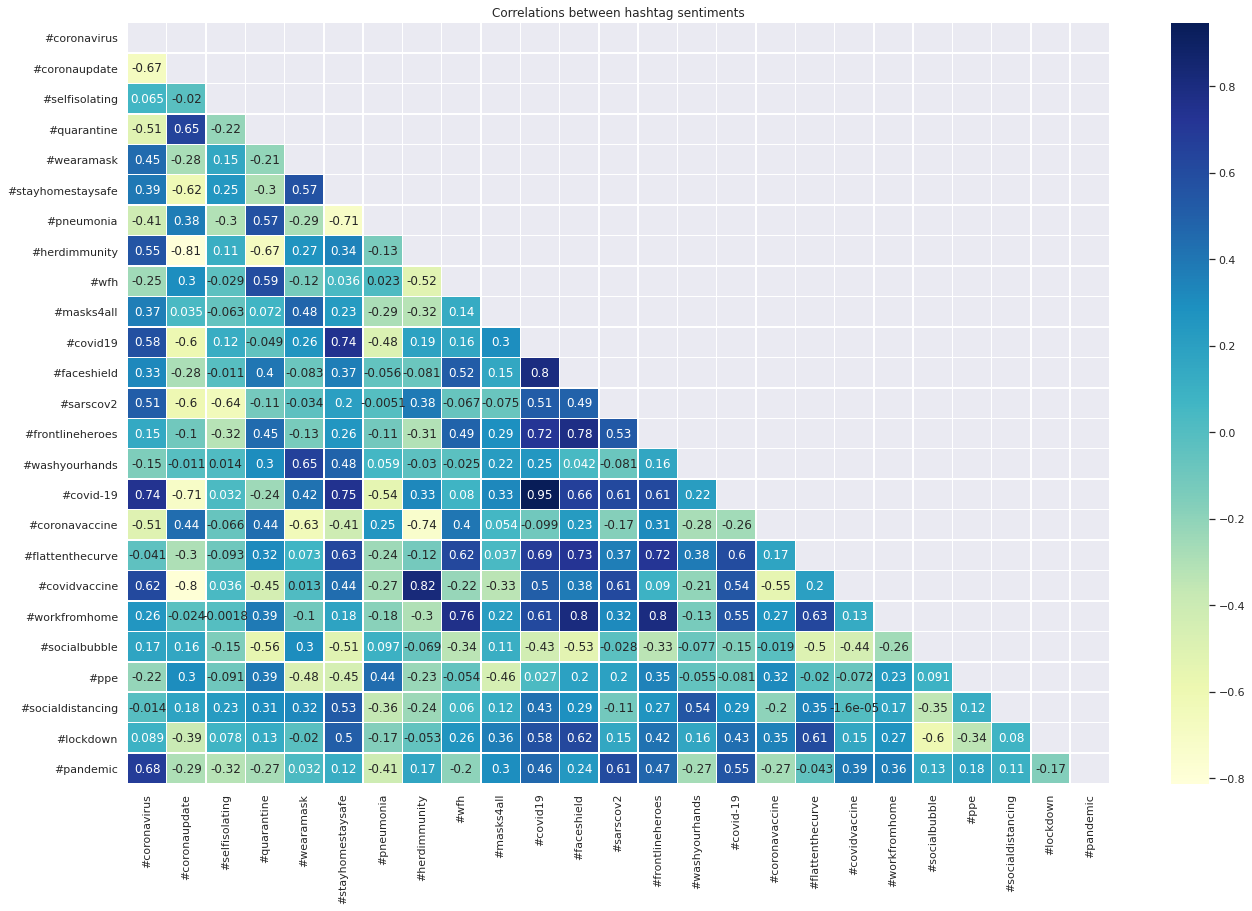

In [134]:
import seaborn as sns;
sns.set(rc={'figure.figsize':(22,14)})
sns.heatmap(monthly_mean_df.corr(), 
            linewidths=.5, annot=True, 
            mask=mask, cmap="YlGnBu").set_title("Correlations between hashtag sentiments");

In [114]:
confirmed_correlation = monthly_mean_df
covid_columns = ["Confirmed", "Deaths", "Recovered", "Active", "Daily_Increase"]
hashtag_covid_data_corr = pd.concat([confirmed_correlation, 
          monthly_global_sum.reset_index()[covid_columns]],
          axis=1)[covid_columns]

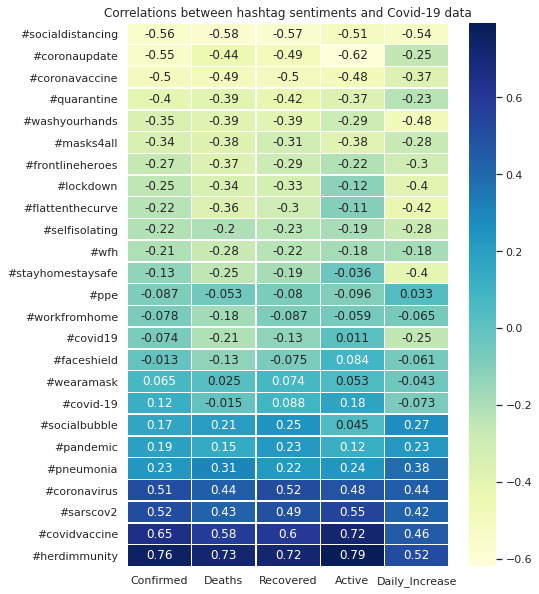

In [116]:
sns.set(rc={'figure.figsize':(7.2,10)})
sns.heatmap(monthly_mean_df.corr()[covid_columns].iloc[:-5,:].sort_values(covid_columns), 
            linewidths=.5, annot=True, cmap="YlGnBu").set_title("Correlations between hashtag sentiments and Covid-19 data");